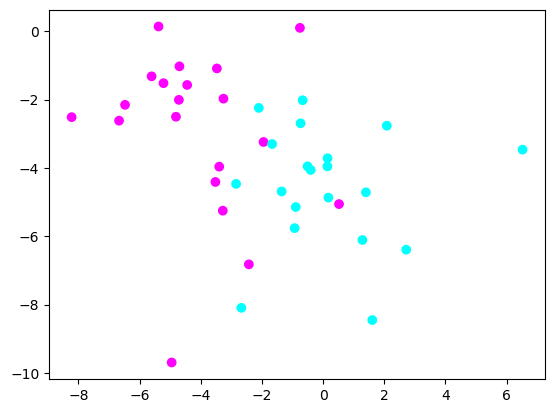

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=40, centers=2, random_state=50, cluster_std=2)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.cool)
plt.show()

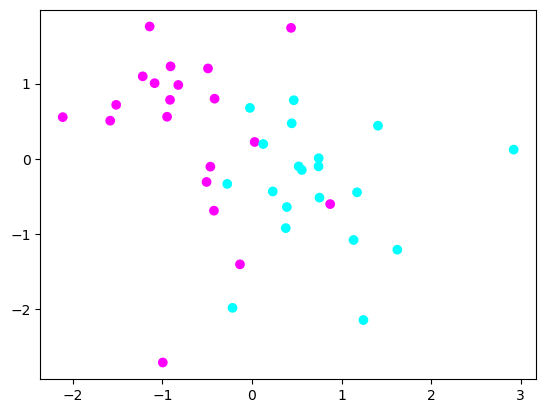

In [2]:
from sklearn.preprocessing import StandardScaler
X_1 = StandardScaler().fit_transform(X)
plt.scatter(X_1[:,0], X_1[:,1], c=y, cmap=plt.cm.cool)
plt.show()

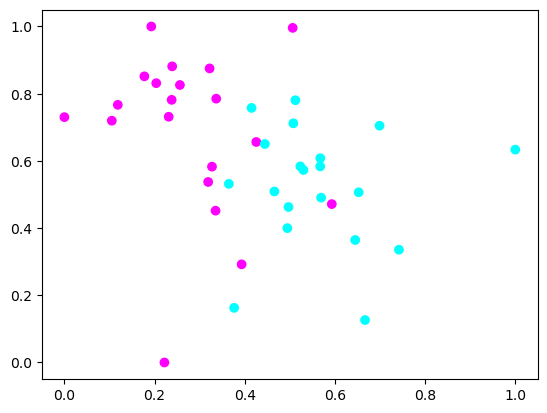

In [3]:
from sklearn.preprocessing import MinMaxScaler
X_2 = MinMaxScaler().fit_transform(X)
plt.scatter(X_2[:,0], X_2[:,1],c=y, cmap=plt.cm.cool)
plt.show()

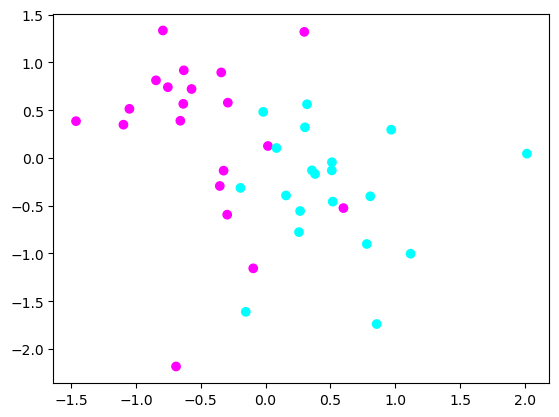

In [4]:
from sklearn.preprocessing import RobustScaler
X_3 = RobustScaler().fit_transform(X)
plt.scatter(X_3[:,0],X_3[:,1],c=y, cmap=plt.cm.cool)
plt.show()

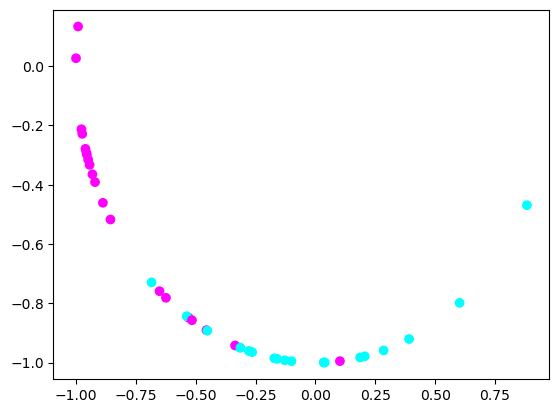

In [5]:
from sklearn.preprocessing import Normalizer
X_4 = Normalizer().fit_transform(X)
plt.scatter(X_4[:,0], X_4[:,1], c=y, cmap=plt.cm.cool)
plt.show()

In [41]:
from sklearn.datasets import load_wine
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
wine = load_wine()


In [42]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target,
                                                   random_state=62)
print(X_train.shape, X_test.shape)

mlp = MLPClassifier(hidden_layer_sizes=[100,100],max_iter=400,
                    random_state=62)
mlp.fit(X_train, y_train)
print('模型得分：{:.2f}'.format(mlp.score(X_test, y_test)))

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_pp = scaler.transform(X_train)
X_test_pp = scaler.transform(X_test)
mlp.fit(X_train_pp, y_train)
print('数据预处理后的模型得分:{:.2f}'.format(mlp.score(X_test_pp,y_test)))


(133, 13) (45, 13)


D:\liuchaochao\DownLoad\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


模型得分：0.93
数据预处理后的模型得分:1.00


inertia表示的是每个样本点到其所在质心的距离之和。按照inertia的定义来说inertia是越小越好。 

但是实际上我们可以发现当分簇的数量越来越多的时候inertia的值自然越来越小。 

甚至再极端的情况下，簇的数量等于样本数的时候，每一个样本就是一个簇，那么inertia就为0。

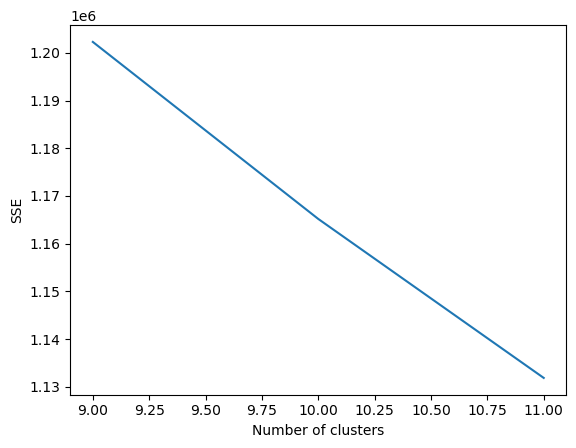

In [59]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

digits = load_digits()
data = digits.data
#data = Normalizer().fit_transform(data)
sse = []

for k in range(9, 12):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    sse.append(kmeans.inertia_)
    

    
plt.plot(range(9, 12), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

代码正确

最适合的聚类数是9

因为在9处，有明显的折点